In [231]:
import pandas as pd
import scipy.stats
%matplotlib inline

In [233]:
%autosave 60

Autosaving every 60 seconds


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## План проведения анализа:
Анализ данных будем проводить следующим образом:   
    1) Построим таблицы сопряженности между двумя параметрами  
    2) Применим метод хи-квадрат для выяснения связи между величинами  
    3) Построим гистограммы, сделаем соответствующие выводы  

## Важное замечание относительно гипотез:
При проведении данного анализа будут проверяться гипотезы о равенстве средних, то есть гипотезы о том, что выживаемость не зависит от какого-либо параметра (иначе, вероятность выжить одинакова в каждой из параметрических подгрупп). Затем, в ходе анализа (в частности, с помощью метода хи-квадрат), данные гипотезы будут либо подтверждаться, либо опровергаться.

## Выживаемость - класс

In [204]:
contingency = pd.crosstab(data['Survived'], data['Pclass'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
test Statistics: 102.88898875696056
degrees of freedom: 2
p-value: 4.549251711298793e-23



### Вывод:
Параметр p-value показывает вероятность получить такие же результаты или более экстремальные результаты при условии того, что верна нулевая гипотеза (по умолчанию - гипотеза о равенстве средних, то есть вероятность выжить в любом классе одинакова). В данном случае вероятность того, что выживаемость не зависит от класса составляет 10^(-23).

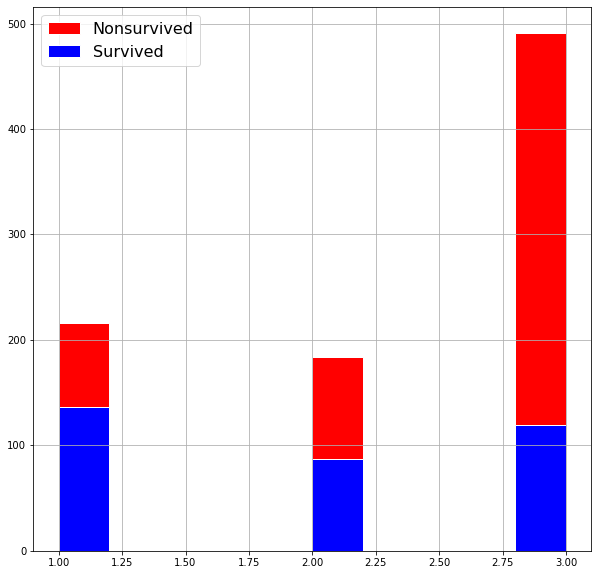

In [244]:
ax = data['Pclass'].hist(figsize=(10, 10), bins=10, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Pclass'].hist(figsize=(10, 10), bins=10, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

Как видно из диаграммы, выживаемость зависит от класса (действительно, вероятность того, что от класса она не зависит очень мала). 

### Замечание: 
Параметр p-value может показывать, с какой вероятностью мы можем получить такие же данные или более экстремальные данные при условии того, что верна нулевая гипотеза, но не показывает вероятность того, что нулевая гипотеза верна. Поэтому в случае высоких значений p-value будем говорить, о "принятии" нулевой гипотезы как одного из возможных предположений, не имея в виду при этом вероятность того, что такая гипотеза верна. При низких значениях p-value будем говорить о "принятии" альтернативной гипотезы, не имея в виду при этом, что вероятность альтернативной гипотезы равна разности между 1 и p-value.

## Выживаемость - возраст

Первое, что сделаем - разобьем пассажиров на группы по возрастам с интервалом 10. Далее построим таблицы сопряженности.

In [164]:
df_0=data[(data['Age'] <10)]
df_1=data[(data['Age'] >10) & (data['Age'] <20)]
df_2=data[(data['Age'] >20) & (data['Age'] <30)]
df_3=data[(data['Age'] >30) & (data['Age'] <40)]
df_4=data[(data['Age'] >40) & (data['Age'] <50)]
df_5=data[(data['Age'] >50) & (data['Age'] <60)]
df_6=data[(data['Age'] >60) & (data['Age'] <70)]
df_7=data[(data['Age'] >70)]

In [155]:
contingency = pd.crosstab(df_0['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       0.42  0.67  0.75  0.83  0.92  1.00  2.00  3.00  4.00  5.00  6.00  \
Survived                                                                     
0            0     0     0     0     0     2     7     1     3     0     1   
1            1     1     2     2     1     5     3     5     7     4     2   

Age       7.00  8.00  9.00  
Survived                    
0            2     2     6  
1            1     2     2  
test Statistics: 18.606474519632417
degrees of freedom: 13
p-value: 0.13581946501090328



In [156]:
contingency = pd.crosstab(df_1['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       11.0  12.0  13.0  14.0  14.5  15.0  16.0  17.0  18.0  19.0
Survived                                                            
0            3     0     0     3     1     1    11     7    17    16
1            1     1     2     3     0     4     6     6     9     9
test Statistics: 9.848129158490758
degrees of freedom: 9
p-value: 0.36291946490093646



In [157]:
contingency = pd.crosstab(df_2['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       20.5  21.0  22.0  23.0  23.5  24.0  24.5  25.0  26.0  27.0  28.0  \
Survived                                                                     
0            1    19    16    10     1    15     1    17    12     7    18   
1            0     5    11     5     0    15     0     6     6    11     7   

Age       28.5  29.0  
Survived              
0            2    12  
1            0     8  
test Statistics: 14.848165602542467
degrees of freedom: 12
p-value: 0.24984509144338696



In [158]:
contingency = pd.crosstab(df_3['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       30.5  31.0  32.0  32.5  33.0  34.0  34.5  35.0  36.0  36.5  37.0  \
Survived                                                                     
0            2     9     9     1     9     9     1     7    11     1     5   
1            0     8     9     1     6     6     0    11    11     0     1   

Age       38.0  39.0  
Survived              
0            6     9  
1            5     5  
test Statistics: 8.351356349555124
degrees of freedom: 12
p-value: 0.7571057310608691



In [159]:
contingency = pd.crosstab(df_4['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       40.5  41.0  42.0  43.0  44.0  45.0  45.5  46.0  47.0  48.0  49.0
Survived                                                                  
0            2     4     7     4     6     7     2     3     8     3     2
1            0     2     6     1     3     5     0     0     1     6     4
test Statistics: 13.671667684167685
degrees of freedom: 10
p-value: 0.18850142228758546



In [160]:
contingency = pd.crosstab(df_5['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       51.0  52.0  53.0  54.0  55.0  55.5  56.0  57.0  58.0  59.0
Survived                                                            
0            5     3     0     5     1     1     2     2     2     2
1            2     3     1     3     1     0     2     0     3     0
test Statistics: 6.593747412008283
degrees of freedom: 9
p-value: 0.6793328849876921



In [161]:
contingency = pd.crosstab(df_6['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       61.0  62.0  63.0  64.0  65.0  66.0
Survived                                    
0            3     2     0     2     3     1
1            0     2     2     0     0     0
test Statistics: 9.886363636363638
degrees of freedom: 5
p-value: 0.07851986250143839



In [165]:
contingency = pd.crosstab(df_7['Survived'], data['Age'])
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Age       70.5  71.0  74.0  80.0
Survived                        
0            1     2     1     0
1            0     0     0     1
test Statistics: 5.000000000000001
degrees of freedom: 3
p-value: 0.17179714429673348



### Вывод:
Полученные значения хи-квадрат говорят о том, что вероятность получить такие данные (или более экстремальные) при условии выполнения гипотезы о равенстве средних составляют от 17 до 76%. Таким образом, в большинстве возрастных групп гипотезу о равенстве средних можно принять, то есть выживаемость довольно слабо зависит от возраста пассажиров.

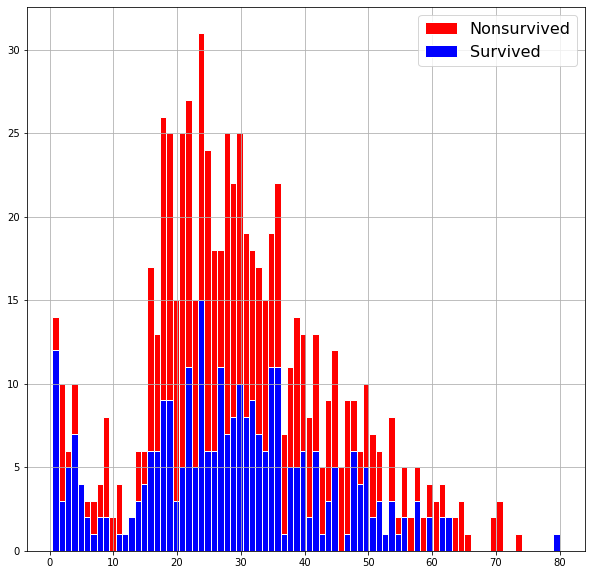

In [173]:
ax = data['Age'].hist(figsize=(10, 10), bins=80, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Age'].hist(figsize=(10, 10), bins=80, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

Полученный с помощью метода хи-квадрат вывод подтверждается гистограммой возраст-выживаемость, на которой не заметно слишком резких скачков в выживаемости в каждой из возрастных категорий. Итак, выживаемость зависит от возраста в довольно маленькой степени.

## Выживаемость - пол

In [205]:
contingency = pd.crosstab(data['Survived'], data['Sex']) 
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Sex       female  male
Survived              
0             81   468
1            233   109
test Statistics: 260.71702016732104
degrees of freedom: 1
p-value: 1.1973570627755645e-58



### Вывод:
Вероятность того, что выживаемость не зависит от пола составляет 10^(-58). Значит, логично предположить, что выживаемость зависит от пола.

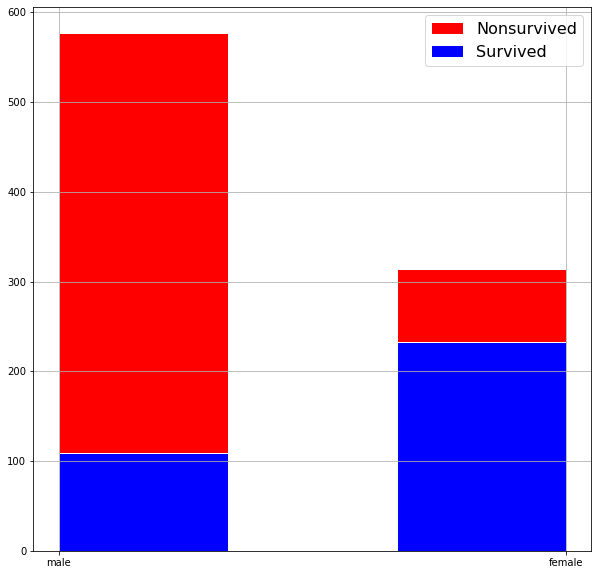

In [189]:
ax = data['Sex'].hist(figsize=(10, 10), bins=3, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Sex'].hist(figsize=(10, 10), bins=3, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

Как видно из диаграммы, количество выживших среди женщин довольно резко отличается от количества выживших среди мужчин. Итак, выживаемость зависит от пола.

## Выживаемость - число братьев и сестер 

In [192]:
contingency = pd.crosstab(data['Survived'], data['SibSp']) 
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
test Statistics: 37.27179291520431
degrees of freedom: 6
p-value: 1.5585810465902116e-06



### Вывод:
Вероятность того, что выживаемость не зависит от числа братьев и сестер составляет 10^(-6). Поэтому предположим, что выживаемость зависит от данного параметра.

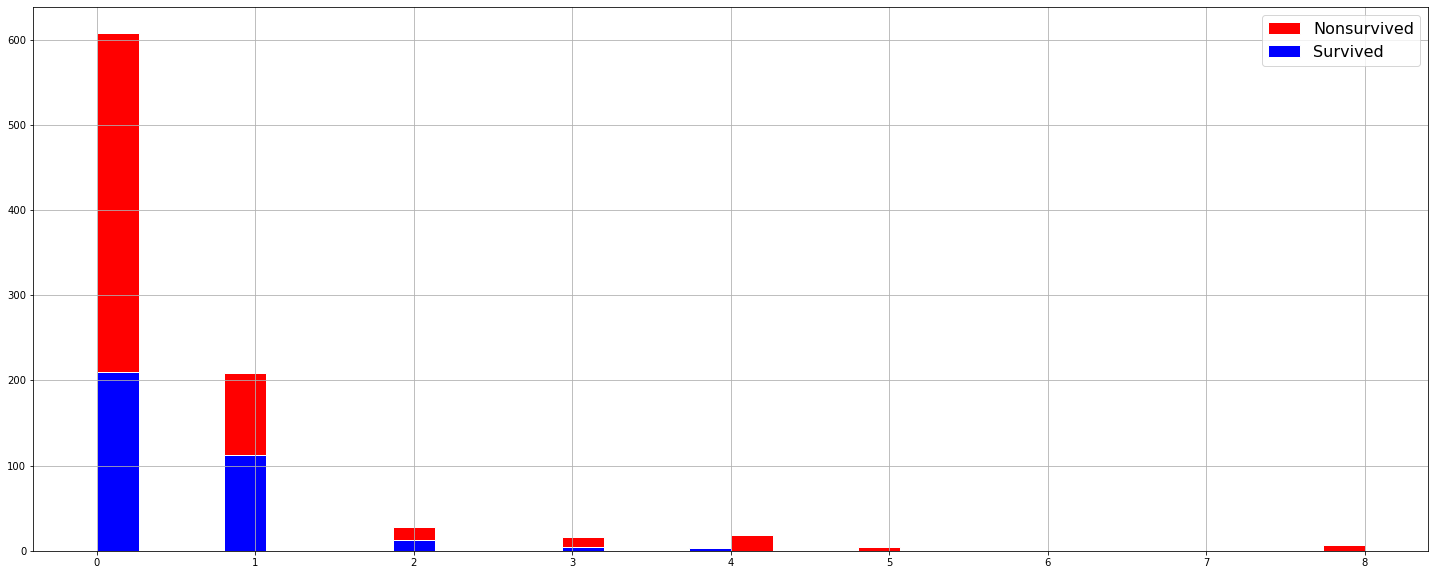

In [227]:
ax = data['SibSp'].hist(figsize=(15, 10), bins=30, edgecolor='white', grid=True, color='red')
data[data['Survived'] == 1]['SibSp'].hist(figsize=(25, 10), bins=15, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

Таким образом, можно утверждать, что количество братьев и сестер является фактором, влияющим на выживаемость, причем, как видно из диаграммы, зависимость между выживаемостью и количеством братьев и сестер обратная.

## Выживаемость - число родителей/детей

In [186]:
contingency = pd.crosstab(data['Survived'], data['Parch']) 
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
test Statistics: 27.925784060236168
degrees of freedom: 6
p-value: 9.703526421039997e-05



### Вывод:
Вероятность того, что выживаемость не зависит от числа родителей/детей составляет 10^(-5). Покажем, что число родителей/детей является параметром, влияющим на выживаемость.

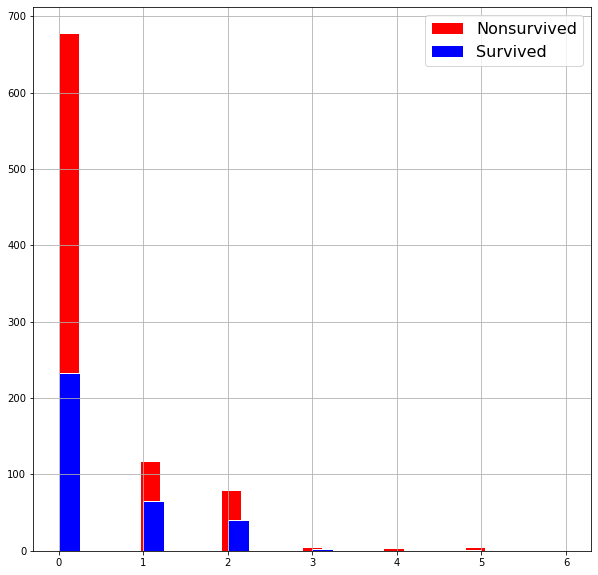

In [255]:
ax = data['Parch'].hist(figsize=(10, 10), bins=25, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Parch'].hist(figsize=(10, 10), bins=20, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

На данной диаграмме опять же наблюдаем обратную зависимость между числом родителей (детей) и количеством выживших. Итак, фактор "количество родителей (детей)" является значащим для параметра "выживаемость".

## Выживаемость - число членов семьи

Для проведения этой части анализа создадим столбец Family, который является суммой столбцов Parch и SibSp.

In [262]:
data['Family']=data['SibSp']+data['Parch']

In [265]:
contingency = pd.crosstab(data['Survived'], data['Family']) 
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Family     0   1   2   3   4   5   6   7   10
Survived                                     
0         374  72  43   8  12  19   8   6   7
1         163  89  59  21   3   3   4   0   0
test Statistics: 80.67231343783078
degrees of freedom: 8
p-value: 3.579668975443533e-14



### Вывод
Как можно видеть, вероятность того, что гипотеза о равенстве средних верна составляет 10^(-14). С помощью диаграммы покажем, что число членов семьи является значащим фактором для параметра "выживаемость".

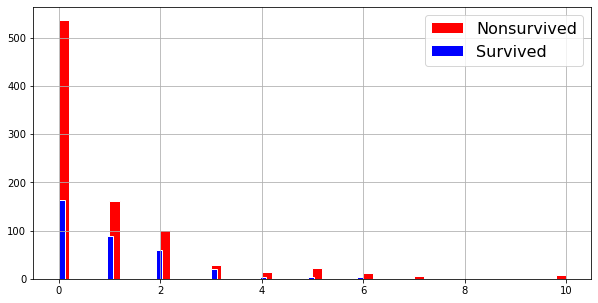

In [272]:
ax = data['Family'].hist(figsize=(10, 5), bins=50, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Family'].hist(figsize=(10, 5), bins=50, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

По диаграмме видна обратная зависимость между выживаемостью и числом членов семьи. Наблюдение вполне логично, так как столбец 'Family' представляет собой сумму столбцов 'SibSp' и 'Parch', при этом при анализе влияния 'SibSp' и 'Parch' на параметр "Выживаемость" наблюдалась обратная зависимость. 

## Выживаемость - порт

In [256]:
contingency = pd.crosstab(data['Survived'], data['Embarked']) 
print(contingency)
chi2, prob, df, expected = scipy.stats.chi2_contingency(contingency) 

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
test Statistics: 26.48914983923762
degrees of freedom: 2
p-value: 1.769922284120912e-06



### Вывод:
Вероятность того, что выживаемость не зависит от порта составляет 10^(-6). С помощью диаграммы покажем, что порт является значащим фактором для параметра "выживаемость".

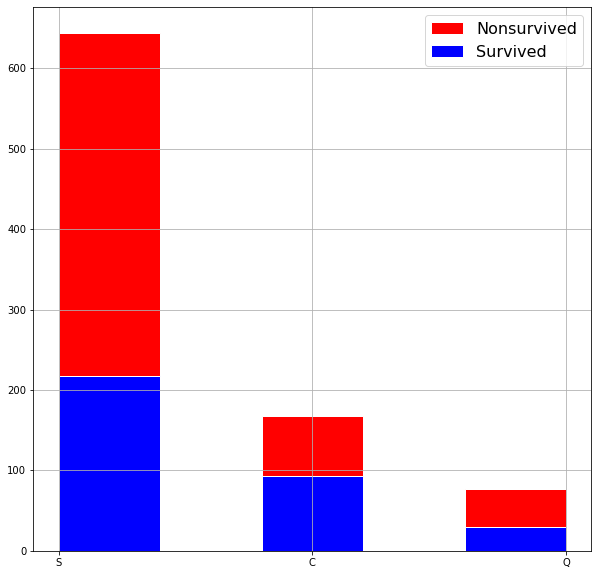

In [261]:
ax = data['Embarked'].hist(figsize=(10, 10), bins=5, edgecolor='white', grid=True, color='red')

data[data['Survived'] == 1]['Embarked'].hist(figsize=(10, 10), bins=5, edgecolor='white', grid=True,  color='blue')
ax.legend(['Nonsurvived', 'Survived'], prop={'size':16})

На данной диаграмме видим еще один пример обратной зависимости между фактором "порт" и между параметром "выживаемость".

# Итоги анализа

Проанализировав предложенные данные, получили, что выживаемость зависит от класса, пола, числа братьев и сестер, числа родителей/детей, числа членов семьи (как суммарный параметр числа братьев и сестер и родителей), порта посадки, причем в последних четырех случаях наблюдается обратная зависимость между фактором и выживаемостью (в данном случае, считаем, что буквы S,C,Q обозначают упорядоченные порты посадки, то есть первый, второй и третий соответственно). Единственным параметром, влияющим на выживаемость в меньшей степени (нельзя говорить об отсутствии влияния вообще в силу определения p-value), является возраст пассажиров.